# [IAPR 2020:][iapr2020] Lab 1 ‒  Image segmentation

**Author:** Arild Madshaven
**Due date:** 26.03.2020

[iapr2018]: https://github.com/LTS5/iapr-2020

## Extract relevant data
We first need to extract the `lab-01-data.tar.gz` archive.
To this end, we use the [tarfile] module from the Python standard library.

[tarfile]: https://docs.python.org/3.6/library/tarfile.html

In [1]:
import tarfile
import os

data_base_path = os.path.join(os.pardir, 'data')
data_folder = 'lab-01-data'
tar_path = os.path.join(data_base_path, data_folder + '.tar.gz')
with tarfile.open(tar_path, mode='r:gz') as tar:
    tar.extractall(path=data_base_path)

## Part 1: Brain segmentation

Your goal: compute the size of the brain (in pixels) in a 2D image of a human head taken by Magnetic Resonance Imaging (MRI).
* Try as many methods as you can, the more the better.
* At least region growing and contour detection.

### 1.1 Brain image visualization

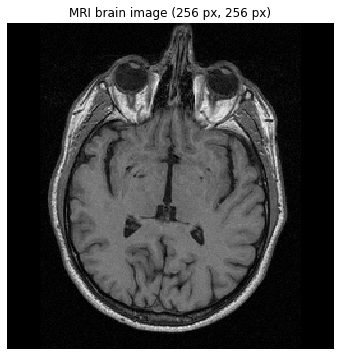

In [2]:
import skimage.io
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Load image
data_path = os.path.join(data_base_path, data_folder)
brain_im = skimage.io.imread(os.path.join(data_path, 'brain-slice40.tiff'))
im_h, im_w = brain_im.shape

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.imshow(brain_im, cmap='gray')
ax.set_title('MRI brain image ({} px, {} px)'.format(im_h, im_w))
ax.axis('off')
plt.show()

In [3]:
def plotHist(im, dsc=''):
    im_h, im_w = im.shape
    
    fig, ax = plt.subplots(1, 1, figsize=(6, 6))
    ax.hist(im)
    ax.set_title(dsc+' ({} px, {} px)'.format(im_h, im_w))
    plt.show()

In [4]:
def plotIm(im, dsc=''):
    im_h, im_w = im.shape

    fig, ax = plt.subplots(1, 1, figsize=(6, 6))
    ax.imshow(im, cmap='gray')
    ax.set_title(dsc+' ({} px, {} px)'.format(im_h, im_w))
    ax.axis('off')
    plt.show()

In [5]:
def thrsh(im, l_thr, u_thr):
    trf = im.copy()
    trf[trf < l_thr] = 0
    trf[u_thr < trf] = 255
    return trf

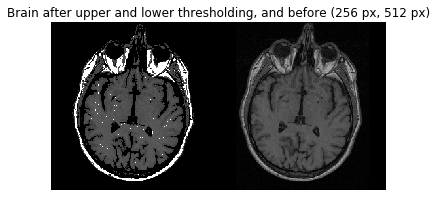

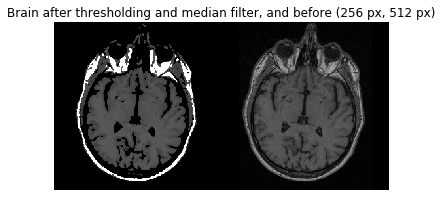

In [81]:
l_thr = 58
u_thr = 93

t_brain = thrsh(brain_im, l_thr, u_thr)
t_brain_blurred = cv2.medianBlur(t_brain, 3)

plotIm(np.concatenate((t_brain, brain_im), axis=1), 'Brain after upper and lower thresholding, and before')
plotIm(np.concatenate((t_brain_blurred, brain_im), axis=1), 'Brain after thresholding and median filter, and before')

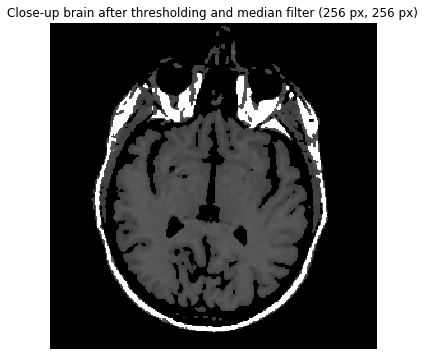

In [82]:
plotIm(t_brain_blurred, 'Close-up brain after thresholding and median filter')

### 1.2 Region growing
Add your implementation and discussion

### Arilds solution

#### Identify seed points as pixels holding middle value between thresholds

In [83]:
seed_points = set()
seed_pixel_val = int((u_thr+l_thr)/2)

In [88]:
for xi, row in enumerate(t_brain_blurred):
    for yi, val in enumerate(row):
        if val == seed_pixel_val: seed_points.add((xi, yi))   

#### Visualize seed points

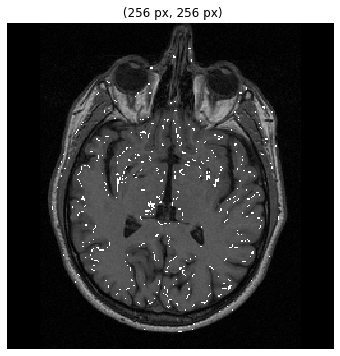

In [89]:
brain_im_cpy = brain_im.copy()
for pix in seed_points: brain_im_cpy[pix] = 255
plotIm(brain_im_cpy)

#### Helper fn. Returns all connex neighbours from one seed

In [11]:
def collectRegion(seedx, seedy, im_arr, lower_threshold, upper_threshold):

    detected = set([(seedx,seedy)])
    visited = set()

    x_min = y_min = 0
    x_max, y_max = im_arr.shape
    
    while len(detected):

        pix = detected.pop()
        
        if pix in visited: continue

        x, y = pix

        for xi in range(max(x-1, x_min), min(x+2, x_max), 2):
                if lower_threshold < im_arr[xi, y] < upper_threshold: detected.add((xi, y))
        for yi in range(max(y-1, y_min), min(y+2, y_max), 2):
                if lower_threshold < im_arr[x, yi] < upper_threshold: detected.add((x, yi))

        visited.add(pix)  
    
    return visited

In [91]:
def collectAllRegions(seed_points, im, l_thr, u_thr):
    
    regions = []
    visited_pixels = set()

    for seed in seed_points:

        if seed in visited_pixels: continue

        region = collectRegion(seed[0], seed[1], t_b2, l_thr, u_thr)
        
        regions.append(region)
        visited_pixels |= region
    
    return regions, visited_pixels

#### Fetch all areas from seed points and visualize on original image

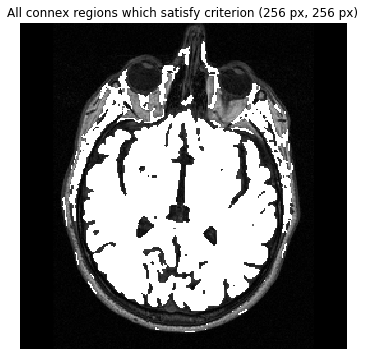

In [93]:
c = brain_im.copy()
regions, visited_pixels = collectAllRegions(seed_points, t_brain_blurred, l_thr, u_thr)

for p in visited_pixels: c[p] = 255
plotIm(c, 'All connex regions which satisfy criterion')

In [96]:
def findLargestRegionIdx(regions):
    max_r = max_ri = 0
    for ri in range(len(regions)):
        size = len(regions[ri])
        if size > max_r:
            max_r = size
            max_ri = ri
    return max_ri

In [97]:
# Brain section is obviously the largest segment
max_ri = findLargestRegionIdx(regions)

#### Visualize detected brain

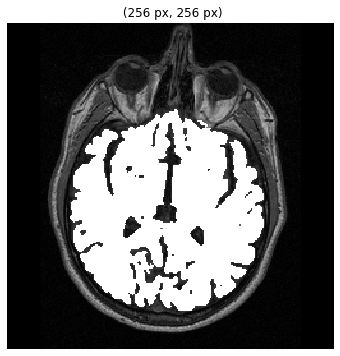

15732

In [98]:
c = brain_im.copy()
for p in regions[max_ri]: c[p] = 255
plotIm(c)
len(regions[max_ri])

### Steal Theo's solution

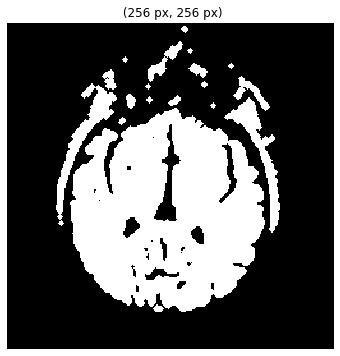

In [75]:
op = np.load('im_open.pkl.npy')
plotIm(op)

#### Define region growing algorithm to collect pixel positions within region

#### Identify seed

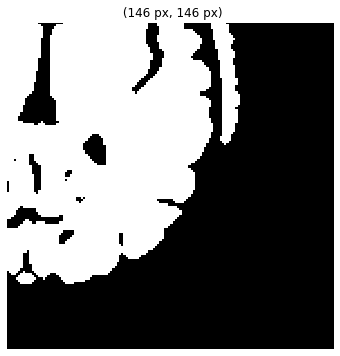

189

In [76]:
plotIm(op[110:, 110:])
op[110, 110]

In [77]:
brain_pixels = collectRegion(110, 110, op, 170, 190)
brain_size = len(brain_pixels)

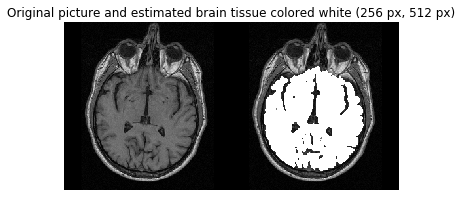

In [78]:
brain_im_cpy = brain_im.copy()
for pix in brain_pixels: brain_im_cpy[pix] = 200
plotIm(np.concatenate((brain_im, brain_im_cpy), axis=1), 'Original picture and estimated brain tissue colored white')

In [79]:
print(f"Brain size: {brain_size} pixels.")

Brain size: 16842 pixels.


### 1.3 Contour detection
Add your implementation and discussion

### 1.4 Additional method(s)
Add your implementation and discussion

## Part 2: Shape/color segmentation

You will find hereafter three pictures taken under three different illuminations, containing some shapes with different colors. We ask you to create a routine to:

1. Count the number of shapes of each color.
2. Compute the total area (in pixels) of each color.

Please note that one specific challenge is to be robust to illumination changes. Therefore some kind of intensity normalization should probably be used.

**Note:** the routine(s) that you will write for this exercise will be useful for the final project as well, so pay special attention to it.

### 2.1 Visualization

In [ ]:
# Load images
im_names = ['arena-shapes-01', 'arena-shapes-02', 'arena-shapes-03']
filenames = [os.path.join(data_path, name) + '.png' for name in im_names]
ic = skimage.io.imread_collection(filenames)
images = skimage.io.concatenate_images(ic)
print('Number of images: ', images.shape[0])
print('Image size: {}, {} '.format(images.shape[1], images.shape[2]))
print('Number of color channels: ', images.shape[-1])

In [ ]:
# Plot images
fig, axes = plt.subplots(1, 3, figsize=(12, 12))
for ax, im, nm in zip(axes.ravel(), images, im_names):
    ax.imshow(im)
    ax.axis('off')
    ax.set_title(nm)
plt.show()

### 2.2 Number of shapes of each color
Add your implementation and discussion

In [ ]:
im0 = images[0]
im1 = images[1]
im2 = images[2]

In [ ]:
# go from pixel arrays [r, g, b] to b
im0_blue = np.array([[p[2] for p in r] for r in im0])
im1_blue = np.array([[p[2] for p in r] for r in im1])
im2_blue = np.array([[p[2] for p in r] for r in im2])

In [ ]:
def normalizeIntensity(im):
    max_val = im.max()
    min_val = im.min()
    im_cpy = im.copy()
    
    im_cpy = np.array([[int((e-min_val)/(max_val-min_val)*255) for e in r] for r in im_cpy])
    
    return im_cpy

In [ ]:
plotIm(im2_blue)
plt.hist(im2_blue)
plt.show()

In [ ]:
kernel = np.ones((5,5), np.float32)
kernel /= 5**2

im2_blue_blur = cv2.filter2D(im2_blue, -1, kernel)
plotIm(im2_blue_blur)
plt.hist(im2_blue_blur)
plt.show()

In [ ]:
c = normalizeIntensity(c)
plotIm(c)
plt.hist(c)
plt.show(c)

In [ ]:
plt.hist(c.flatten())
plt.show()

In [ ]:
bins, hist = np.histogram(c.flatten(), bins=256, range=(0, 256))

### 2.3 Total area (in pixels) of each color
Add your implementation and discussion